### <p style="text-align: right;"> &#9989; Andrew Koren.</p>

# PHY480 Day 22

## In-class assignment: Molecular dynamics simulations

In this in-class assignment we start building code for molecular dynamics simulations, in particular, handling of the periodic and hard wall boundary conditions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Consider a system of particles in a box with sizes given by `lbox` array. Here we consider two-dimensional systems that can be easily illustrated, however, the code can be written to work in any dimensions, since the operations are done with vectors, so their sizes do not actually matter.

In [3]:
### main parameters

# dimension
dim = 2

# number of particles
N = 10 # increase once the code is working properly

# particle radius (for later plotting)
radius = 0.1

# box sizes (the size of this array should match "dim")
lbox = np.array( [4.0,4.0] )

# allocate arrays for the position r and velocity v,
# the first index is particle index and the second is the vector component
r = np.zeros( (N,dim) )
v = np.zeros( (N,dim) )


**Task 1.** Write a function that initializes the positions of particles uniformly randomly in the given box.

In [4]:
# initialize particle positions
# Input:
# lbox -- array with sizes
# r -- allocated array of shape N * dim,
#      where N is the number of particles and dim is the dimensionality
# Output:
# the input r is changed
def initial_r( lbox, r ):

    r[:] = np.random.rand(*r.shape) * lbox




**Task 2.** Write a similar function that initializes the velocity uniformly in the range $[-1,1]$. This is enough for testing purposes but in general we will need a Gaussian distribution.


In [5]:
# initialize particle velocities
# Input:
# lbox -- array with sizes
# v -- allocated array of shape N * dim,
#      where N is the number of particles and dim is the dimensionality
# Output:
# the input v is changed
def initial_v( lbox, v, sigma=1, mu=0 ):

    v[:] = np.random.rand(*v.shape) * 2 - 1
    #v[:] = sigma * np.random.randn(*v.shape) * lbox + mu

**Task 3.** Write a function that updates the positions `r` based on the current value of `v`.

In [6]:
# propagate the particle positions by step dt
# Input:
# dt -- time step
# r -- array with particle positions
# v -- array with particle velocities
# Output:
# the input r is changed
def update_r( dt, r, v ):

    r[:] = r + v*dt

**Task 4.** Write a function that handles periodic boundary conditions, i.e. if it finds positions that are outside of the box, it folds them properly back in.

In [7]:
# apply periodic boundary conditions
# Input:
# lbox -- array with sizes
# r -- array with particle positions
# v -- array with particle velocities
# Output:
# the input r is changed
def boundary_periodic( lbox, r, v ):

    r[:] = r % lbox

**Task 5.** Write a function that handles the hard wall boundary conditions.

In [8]:
# apply hard wall boundary conditions
# Input:
# lbox -- array with sizes
# r -- array with particle positions
# v -- array with particle velocities
# Output:
# the inputs r and v are changed
def boundary_wall( lbox, r, v ):

    # loop on particles and r components,
    # if r is outside, reflect back in,
    # reverse the velocity if needed
    
    #safety
    if (abs(r - lbox/2) > lbox*1.5).any():
        raise ValueError('full ring not implemented!')

    #hard wall
    v[r<0] *= -1
    r[r<0] *= -1

    v[r>lbox] *= -1
    r[:] = np.where(r>lbox, 2*lbox-r, r)

**Task 6.** Run a short simulation where the velocities are unchanged and the positions are propagated and debug your functions.

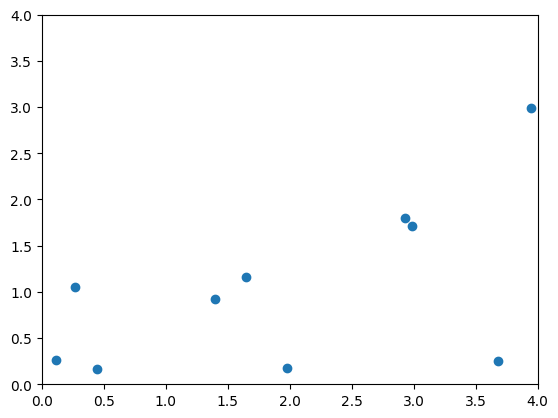

11.11111111111111


In [77]:
from IPython.display import display, clear_output
import time 


# for reproducibility
np.random.seed(1)

# time step
fps = 100
dt = 1/fps
display_rate = 1


# number of simulation steps
runtime = 10 # seconds
Nsim = int(runtime*fps)

# initialize particle positions and velocities
initial_r( lbox, r )
initial_v( lbox, v )

# periodic boundary conditions if True
PBC = True
boundary = [boundary_wall, boundary_periodic]

fig, ax = plt.subplots(1,1)
plt.xlim(0, lbox[0])
plt.ylim(0, lbox[1])

particle_plot = ax.scatter(r[:,0], r[:,1])
a = time.time()

# main simulation loop
for i in range(Nsim):
    # propagate positions r
    update_r( dt, r, v)
    # apply boundary conditions
    boundary[PBC](lbox, r, v)

    # true live display, not ideal for more complex calculations
    clear_output(wait=True) 
    b = time.time()
    if i % display_rate == 0:
        particle_plot.set_offsets(r)
        if b - a < dt*display_rate:
            time.sleep(dt*display_rate-(b-a))
            a = time.time()
            display(fig)  
        else:
            display_rate += 1        

print(fps/display_rate)
plt.close()

1

In [40]:
a = time.time()
time.sleep(19)

time.sleep((dt-(time.time() - a))%dt )

(time.time() - a)%dt

KeyboardInterrupt: 

In [21]:
dt

0.016666666666666666

In [ ]:
time.sleep(dt)

NameError: name 'time' is not defined

&#169; Copyright 2025,  Michigan State University Board of Trustees